In [49]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

In [50]:
df=pd.read_csv("UBER.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-30,24.420000,24.850000,24.240000,24.730000,24.730000,20474100
1,2023-01-03,25.370001,25.750000,25.020000,25.360001,25.360001,22155300
2,2023-01-04,25.730000,25.969999,25.320000,25.910000,25.910000,14816000
3,2023-01-05,25.730000,26.010000,25.549999,25.549999,25.549999,9942000
4,2023-01-06,25.860001,26.540001,25.400000,26.400000,26.400000,19443800
...,...,...,...,...,...,...,...
246,2023-12-22,61.700001,62.235001,61.279999,61.709999,61.709999,14709400
247,2023-12-26,61.709999,62.200001,61.313999,61.980000,61.980000,16077200
248,2023-12-27,62.000000,63.430000,62.000000,63.279999,63.279999,20806000
249,2023-12-28,63.450001,63.529999,62.834999,63.139999,63.139999,13795600


In [51]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-30,24.420000,24.850000,24.240000,24.730000,24.730000,20474100
1,2023-01-03,25.370001,25.750000,25.020000,25.360001,25.360001,22155300
2,2023-01-04,25.730000,25.969999,25.320000,25.910000,25.910000,14816000
3,2023-01-05,25.730000,26.010000,25.549999,25.549999,25.549999,9942000
4,2023-01-06,25.860001,26.540001,25.400000,26.400000,26.400000,19443800
5,2023-01-09,27.299999,28.049999,27.150000,27.400000,27.400000,24962100
6,2023-01-10,27.400000,28.250000,27.150000,28.040001,28.040001,15413700
7,2023-01-11,28.240000,28.520000,27.920000,28.350000,28.350000,15421700
8,2023-01-12,28.850000,29.184999,28.200001,29.030001,29.030001,17513400
9,2023-01-13,28.680000,29.500000,28.660000,29.440001,29.440001,16940700


In [52]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
241,2023-12-15,62.160000,63.529999,61.410000,61.860001,61.860001,364231800
242,2023-12-18,62.009998,62.490002,61.330002,61.730000,61.730000,28614000
243,2023-12-19,61.880001,62.700001,61.689999,62.119999,62.119999,26813800
244,2023-12-20,61.490002,62.279999,60.619999,60.680000,60.680000,28286100
245,2023-12-21,61.240002,61.759998,60.825001,61.459999,61.459999,19999600
246,2023-12-22,61.700001,62.235001,61.279999,61.709999,61.709999,14709400
247,2023-12-26,61.709999,62.200001,61.313999,61.980000,61.980000,16077200
248,2023-12-27,62.000000,63.430000,62.000000,63.279999,63.279999,20806000
249,2023-12-28,63.450001,63.529999,62.834999,63.139999,63.139999,13795600
250,2023-12-29,62.360001,63.139999,61.299999,61.570000,61.570000,21602500


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [54]:
df["Date"]=pd.to_datetime(df["Date"])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Adj Close'}>],
       [<Axes: title={'center': 'Volume'}>, <Axes: >, <Axes: >]],
      dtype=object)

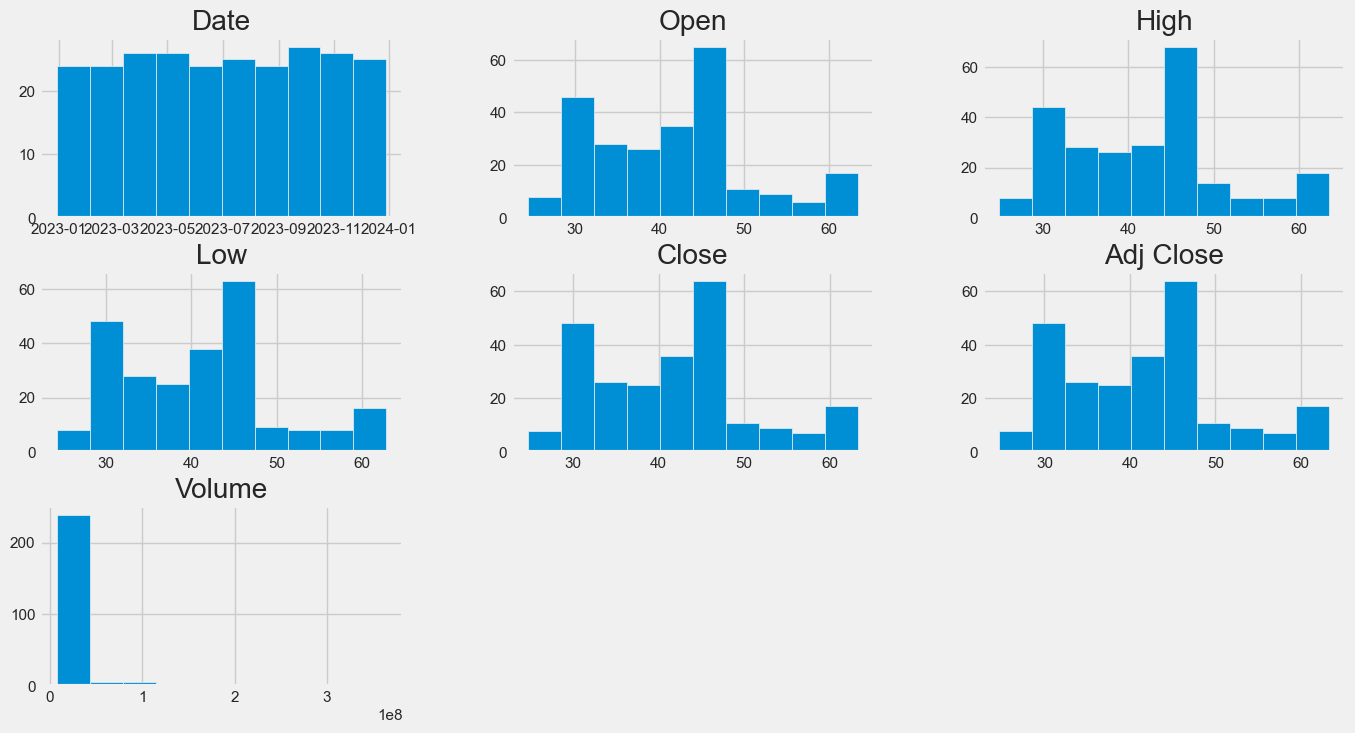

In [56]:
df.hist(figsize=(15,8))

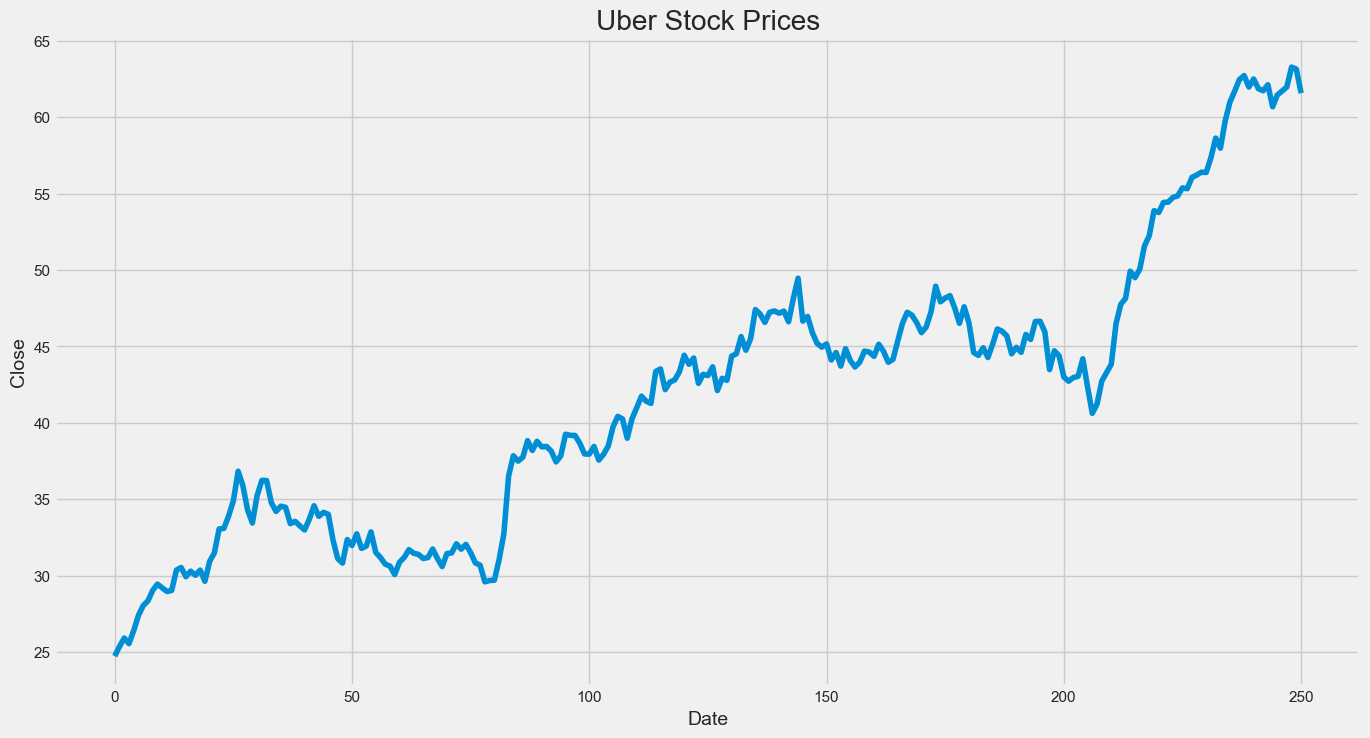

In [57]:
plt.figure(figsize=(15,8))
plt.title("Uber Stock Prices")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(df["Close"])
plt.show()



looking at the correlation between the features of this dataset:

C:\Users\DELL\AppData\Local\Temp\ipykernel_8624\387840868.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")


<Axes: >

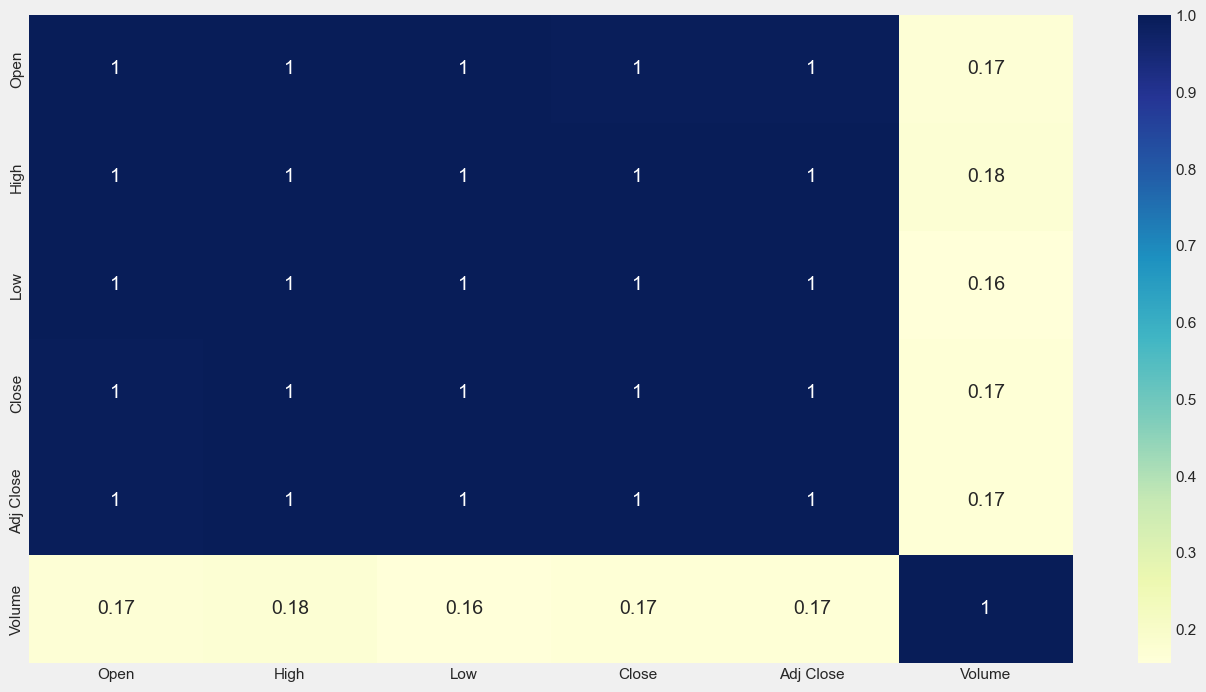

In [58]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

I will prepare the data to fit into the machine learning model. In this step, I will first add the most important features to x and the target column to y, and then I will divide the dataset into training and test sets:

In [59]:
x = df[["Open", "High", "Low"]]
y = df["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Using the Decision Tree Regression Algorithm to train the Uber Stock Price prediction model and have a look at the predicted stock prices for the next 5 days:

In [60]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
data = pd.DataFrame(data={"Predicted Rate": y_pred})
print(data.head())

   Predicted Rate
0       44.349998
1       27.400000
2       43.970001
3       30.070000
4       41.230000


Calculating the models score.

In [64]:
score = model.score(x_test, ytest)
score

0.9935644952788405

model scores 99%
